# Modelado Baseline de Clasificación EMG
Este notebook crea y evalúa el primer modelo de clasificación usando los datos procesados en `final_feature_data.parquet`.

In [37]:
# 1. Importar librerías y cargar datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('../data/processed/final_feature_data.parquet')
print(f'Shape: {df.shape}')
print(df['Clase'].value_counts())
df.head()

Shape: (104804, 17)
Clase
basal        30720
adelante     15359
atras        15359
derecha      15359
izquierda    15359
reposo       12648
Name: count, dtype: int64


,RMS_EXG Channel 0,WL_EXG Channel 0,RMS_EXG Channel 1,WL_EXG Channel 1,RMS_EXG Channel 2,WL_EXG Channel 2,RMS_EXG Channel 3,WL_EXG Channel 3,RMS_EXG Channel 4,WL_EXG Channel 4,RMS_EXG Channel 5,WL_EXG Channel 5,RMS_EXG Channel 6,WL_EXG Channel 6,RMS_EXG Channel 7,WL_EXG Channel 7,Clase
1,0.872088,0.000024,1.280368,0.005878,2.132244,0.000353,1.998439,0.001438,1.576958,0.039054,2.803140,0.336786,2.207718,0.017805,1.643290,0.003151,basal
2,0.875658,0.010704,1.296320,0.056102,2.129443,0.008945,2.000426,0.008114,1.582736,0.041188,2.780527,0.568515,2.203041,0.022946,1.643290,0.004727,basal
3,0.877819,0.012219,1.308854,0.074208,2.126982,0.013190,2.002133,0.010964,1.576158,0.079162,2.687670,0.915731,2.203554,0.034384,1.644015,0.007624,basal
4,0.876508,0.025244,1.305130,0.129838,2.125780,0.014571,2.001433,0.019581,1.571421,0.083091,2.648316,1.012881,2.204254,0.036342,1.644218,0.008781,basal
5,0.873829,0.036180,1.294588,0.179433,2.124787,0.015717,1.999626,0.027641,1.576304,0.131261,2.706917,1.510910,2.201815,0.053817,1.643536,0.013694,basal


In [38]:
# 2. Preparar X e y
X = df.drop('Clase', axis=1)
y = df['Clase']


Train: (67074, 16), Validación: (16769, 16), Test: (20961, 16)
Accuracy (validación): 1.0
Reporte de clasificación (validación):
              precision    recall  f1-score   support

    adelante       1.00      1.00      1.00      2458
       atras       1.00      1.00      1.00      2457
       basal       1.00      1.00      1.00      4915
     derecha       1.00      1.00      1.00      2458
   izquierda       1.00      1.00      1.00      2457
      reposo       1.00      1.00      1.00      2024

    accuracy                           1.00     16769
   macro avg       1.00      1.00      1.00     16769
weighted avg       1.00      1.00      1.00     16769

Accuracy (test): 1.0
Reporte de clasificación (test):
              precision    recall  f1-score   support

    adelante       1.00      1.00      1.00      3072
       atras       1.00      1.00      1.00      3072
       basal       1.00      1.00      1.00      6144
     derecha       1.00      1.00      1.00      3072
   

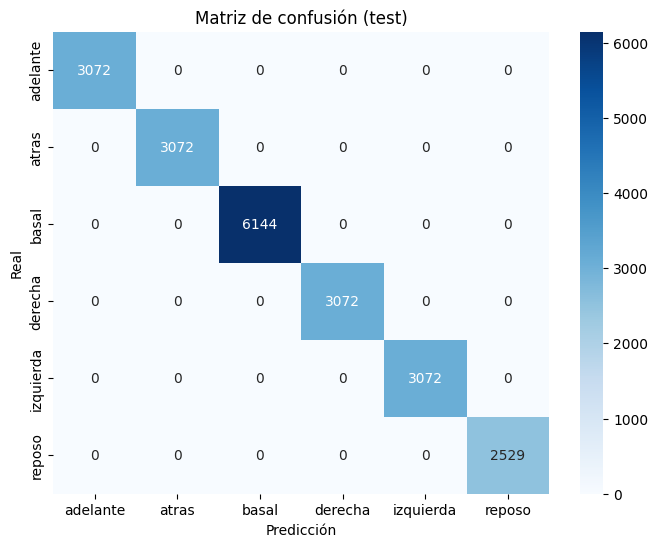

In [39]:
# Nueva partición: entrenamiento, validación y test
from sklearn.model_selection import train_test_split

# 1. Separar conjunto de test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Separar conjunto de validación (20% de lo que queda)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Validación: {X_val.shape}, Test: {X_test.shape}")

# Entrenamiento usando solo el conjunto de entrenamiento
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluación en validación
y_val_pred = clf.predict(X_val)
print('Accuracy (validación):', accuracy_score(y_val, y_val_pred))
print('Reporte de clasificación (validación):')
print(classification_report(y_val, y_val_pred))

# Evaluación final en test
y_test_pred = clf.predict(X_test)
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))
print('Reporte de clasificación (test):')
print(classification_report(y_test, y_test_pred))

# Matriz de confusión para test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (test)')
plt.show()

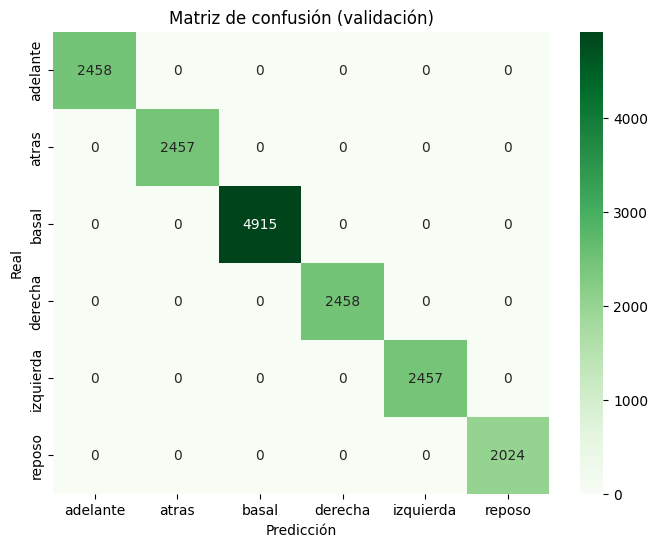

In [40]:
# Matriz de confusión para validación
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (validación)')
plt.show()

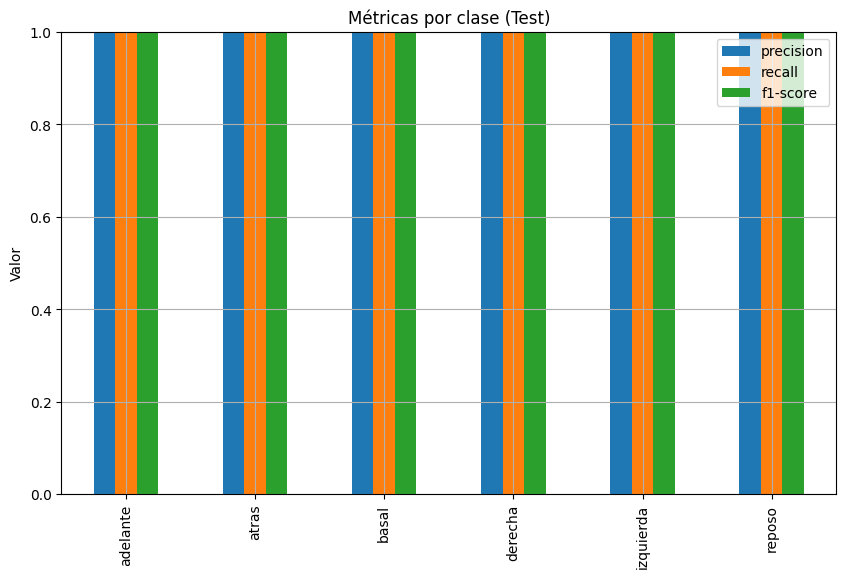

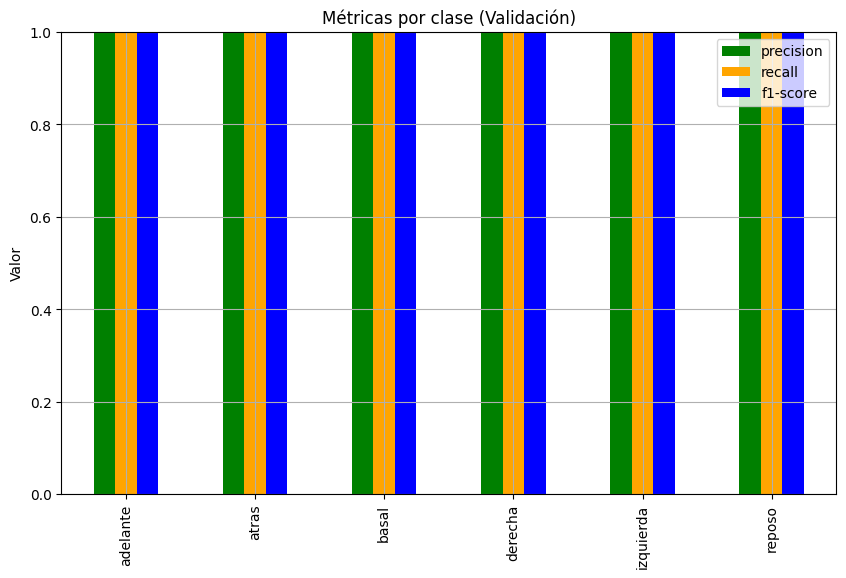

In [41]:
# Visualización de métricas por clase (precision, recall, f1-score)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Para test
report_test = classification_report(y_test, y_test_pred, output_dict=True)
df_report_test = pd.DataFrame(report_test).transpose().iloc[:-3]
df_report_test[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6))
plt.title('Métricas por clase (Test)')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(True)
plt.show()

# Para validación
report_val = classification_report(y_val, y_val_pred, output_dict=True)
df_report_val = pd.DataFrame(report_val).transpose().iloc[:-3]
df_report_val[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6), color=['green','orange','blue'])
plt.title('Métricas por clase (Validación)')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [42]:
# Validación cruzada (cross-validation)
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf_cv = RandomForestClassifier(random_state=42)

scores = cross_val_score(clf_cv, X, y, cv=cv, scoring='accuracy')
print('Accuracy por fold:', scores)
print(f'Accuracy promedio (cross-validation): {scores.mean():.4f} ± {scores.std():.4f}')

Accuracy por fold: [1. 1. 1. 1. 1.]
Accuracy promedio (cross-validation): 1.0000 ± 0.0000


In [43]:
# Guardar el modelo entrenado en la carpeta models/
import joblib

joblib.dump(clf, '../models/random_forest_emg.pkl')
print('Modelo guardado en models/random_forest_emg.pkl')

Modelo guardado en models/random_forest_emg.pkl
